In [61]:
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from collections import Counter

In [62]:
def my_mode(data):
    counter = Counter(data)
    max_count = max(counter.values())
    modes = [value for value, count in counter.items() if count == max_count]
    return modes if len(modes) > 1 else modes[0]


In [63]:
def knn(X, y, Z, k, p):
    m = Z.shape[0]
    w = np.empty(m, dtype=y.dtype)

    for i in range(m):
        distances = np.linalg.norm(Z[i, :] - X, ord=p, axis=1)
        sorted_indices = np.argsort(distances)
        k_nearest_indices = sorted_indices[:k]

        k_nearest_labels = y[k_nearest_indices]
        mode_result = my_mode(k_nearest_labels)

        if mode_result.size > 1:
            selected_label = np.random.choice(mode_result)
        else:
            selected_label = mode_result

        w[i] = selected_label
    return w


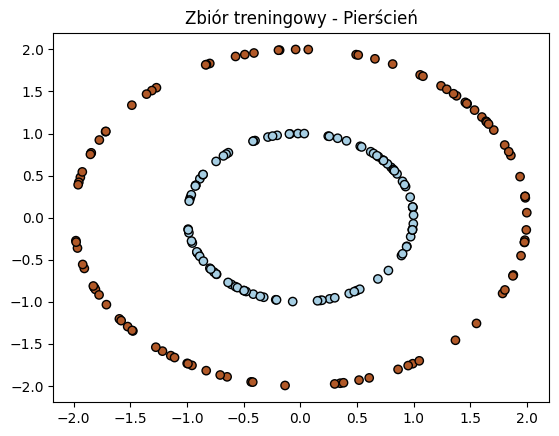

In [64]:
# Utwórzmy zbiór treningowy
np.random.seed(0)
theta = 2 * np.pi * np.random.rand(100)
inner_circle = np.array([np.cos(theta), np.sin(theta)]).T
outer_circle = 2 * np.array([np.cos(theta), np.sin(theta)]).T

X_train = np.vstack([inner_circle, outer_circle])
y_train = np.hstack([np.zeros(100), np.ones(100)])

# Utwórzmy zbiór testowy
theta_test = 2 * np.pi * np.random.rand(30)
inner_circle_test = np.array([np.cos(theta_test), np.sin(theta_test)]).T
outer_circle_test = 2 * np.array([np.cos(theta_test), np.sin(theta_test)]).T

X_test = np.vstack([inner_circle_test, outer_circle_test])
y_test = np.hstack([np.zeros(30), np.ones(30)])

# Wyświetlmy zbiór treningowy
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
plt.title('Zbiór treningowy - Pierścień')
plt.show()

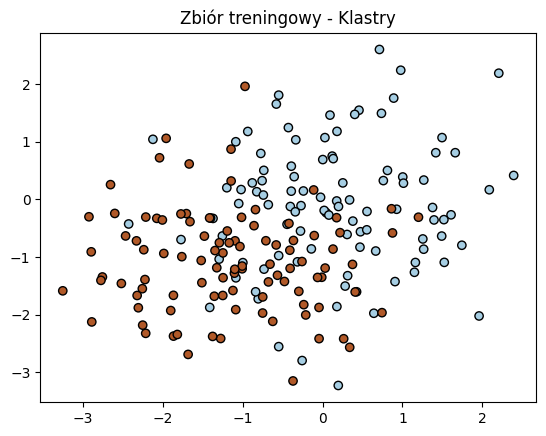

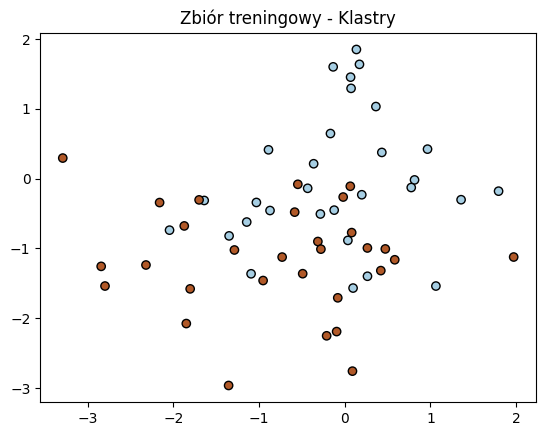

In [65]:
np.random.seed(123)
cluster1 = np.random.randn(100, 2) + np.array([0, 0])
cluster2 = np.random.randn(100, 2) + np.array([-1, -1])

X_train_clusters = np.vstack([cluster1, cluster2])
y_train_clusters = np.hstack([np.zeros(100), np.ones(100)])

np.random.seed(321)

cluster1_test = np.random.randn(30, 2) + np.array([0, 0])
cluster2_test = np.random.randn(30, 2) + np.array([-1, -1])

X_test_clusters = np.vstack([cluster1_test, cluster2_test])
y_test_clusters = np.hstack([np.zeros(30), np.ones(30)])


# Wyświetlmy zbiór treningowy
plt.scatter(X_train_clusters[:, 0], X_train_clusters[:, 1], c=y_train_clusters, cmap=plt.cm.Paired, edgecolor='k')
plt.title('Zbiór treningowy - Klastry')
plt.show()


# Wyświetlmy zbiór treningowy
plt.scatter(X_test_clusters[:, 0], X_test_clusters[:, 1],c=y_test_clusters, cmap=plt.cm.Paired, edgecolor='k')
plt.title('Zbiór treningowy - Klastry')
plt.show()

In [66]:
# Przetestuj algorytm k-najbliższych sąsiadów na zbiorze ringów
#p=1
labels_ring = knn(X_train, y_train, X_test, 5,1)
accuracy_ring = accuracy_score(y_test, labels_ring)

print("Wyniki dla zbioru pierścienia:")
print("Etykiety przewidziane:", labels_ring)
print("Dokładność:", accuracy_ring)
#p=2
labels_ring = knn(X_train, y_train, X_test, 5,2)
accuracy_ring = accuracy_score(y_test, labels_ring)

print("Wyniki dla zbioru pierścienia:")
print("Etykiety przewidziane:", labels_ring)
print("Dokładność:", accuracy_ring)


# Przetestuj algorytm k-najbliższych sąsiadów na zbiorze klastrów
labels_clusters = knn(X_train_clusters, y_train_clusters, X_test_clusters, 7,2)
accuracy_clusters = accuracy_score(y_test, y_test_clusters)

print("Wyniki dla zbioru klastrów:")
print("Dokładność:", accuracy_clusters)

Wyniki dla zbioru pierścienia:
Etykiety przewidziane: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Dokładność: 1.0
Wyniki dla zbioru pierścienia:
Etykiety przewidziane: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Dokładność: 1.0
Wyniki dla zbioru klastrów:
Dokładność: 1.0


In [74]:
k = [3,5,7]
p = [1,2,3]

In [76]:

for i in k:
    for j in p:
        labels_ring = knn(X_train, y_train, X_test, i,j)
        accuracy_ring = accuracy_score(y_test, labels_ring)
        if j == 3:
            labels_ring = knn(X_train, y_train, X_test, i,np.inf)
            accuracy_ring = accuracy_score(y_test, labels_ring)
        
    print("Wynik dla p=" ,j,"i k=",i, "pierścień")
    print("Dokładność:", accuracy_ring)


Wynik dla p= 3 i k= 3 pierścień
Dokładność: 1.0
Wynik dla p= 3 i k= 5 pierścień
Dokładność: 1.0
Wynik dla p= 3 i k= 7 pierścień
Dokładność: 1.0
